In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

from renewable_data_load import *

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [9]:
# largescale change in cf

In [26]:
def cf_delta(resource, module, domain, variable, frequency, simulation, gwl1, gwl2):
    gwl_list = get_ren_cf_data_gwl(
        resource, module, domain, variable, frequency, simulation, [gwl1, gwl2]
    )
    delta = (
        gwl_list[1].mean(dim="time").squeeze() - gwl_list[0].mean(dim="time").squeeze()
    )
    delta = delta.compute()
    return delta


def drought_count_delta(
    resource, module, domain, variable, frequency, simulation, gwl1, gwl2
):
    gwl_list = [
        get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl1
        ),
        get_ren_drought_data(
            resource, module, domain, variable, frequency, simulation, gwl2
        ),
    ]
    delta = (
        gwl_list[1].sum(["month", "year"]).squeeze()
        - gwl_list[0].sum(["month", "year"]).squeeze()
    )
    delta = delta.compute()
    return delta

In [11]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "day"
simulation = "all"
simulation = "ec-earth3"

delta_cf = cf_delta(resource, module, domain, variable, frequency, simulation, 0.8, 2.0)

ec-earth3 0.8C: 1988-2017
ec-earth3 2.0C: 2017-2046


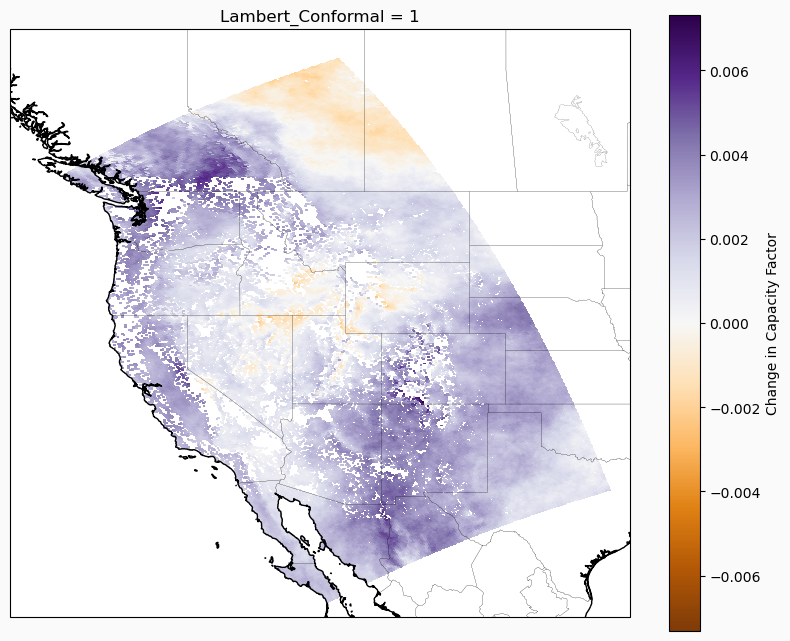

In [12]:
fig = plt.figure(figsize=(10, 8), facecolor="#FAFAFA")  # open matplotlib figure
ax = plt.axes(projection=ccrs.PlateCarree())
delta_cf.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Change in Capacity Factor"},
    cmap="PuOr",
)

ax.set_extent([-130, -95, 25, 57])

ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# adjust lat/lon bounds
# ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

ec-earth3 0.8C: 1988-2017
ec-earth3 3.0C: 2037-2066
mpi-esm1-2-hr 0.8C: 1981-2010
mpi-esm1-2-hr 3.0C: 2058-2087
miroc6 0.8C: 1997-2026
miroc6 3.0C: 2056-2085
taiesm1 0.8C: 1996-2025
taiesm1 3.0C: 2033-2062


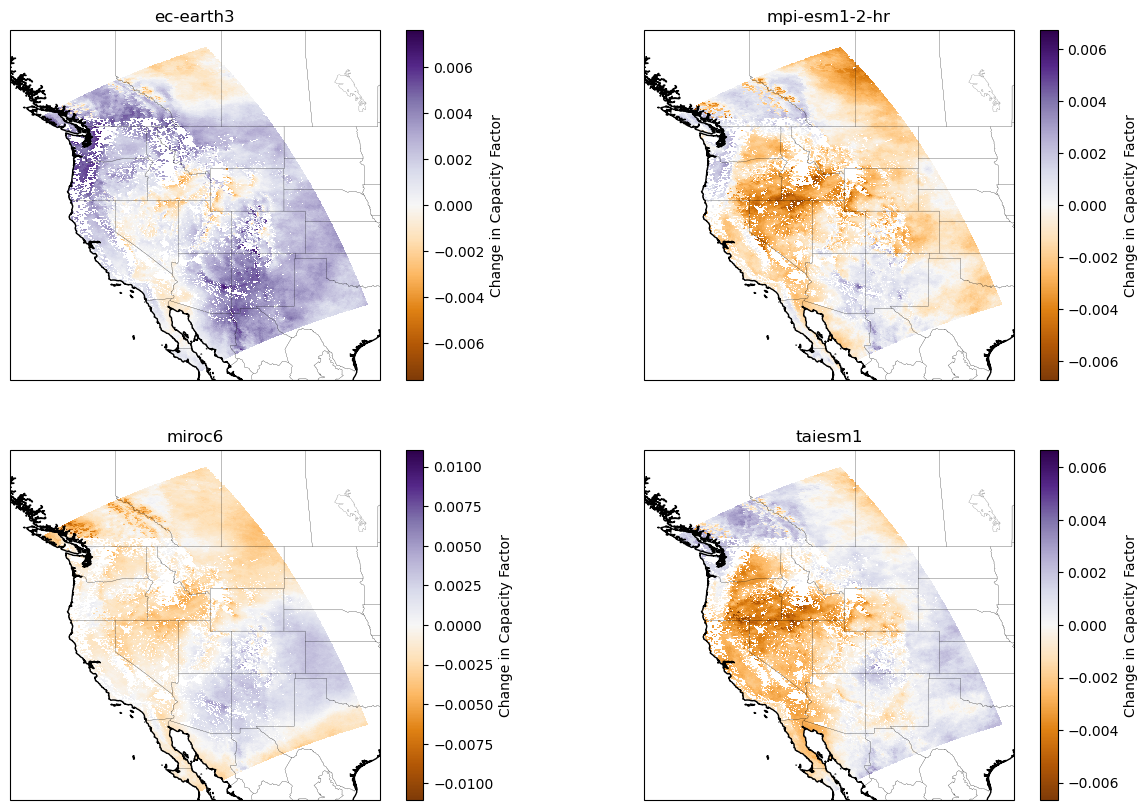

In [ ]:
# calculate the delta for each simulation, and make a multipanel plot of the results
simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = cf_delta(
        resource, module, domain, variable, frequency, simulation, 0.8, 3.0
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.01,
        vmax=0.01,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

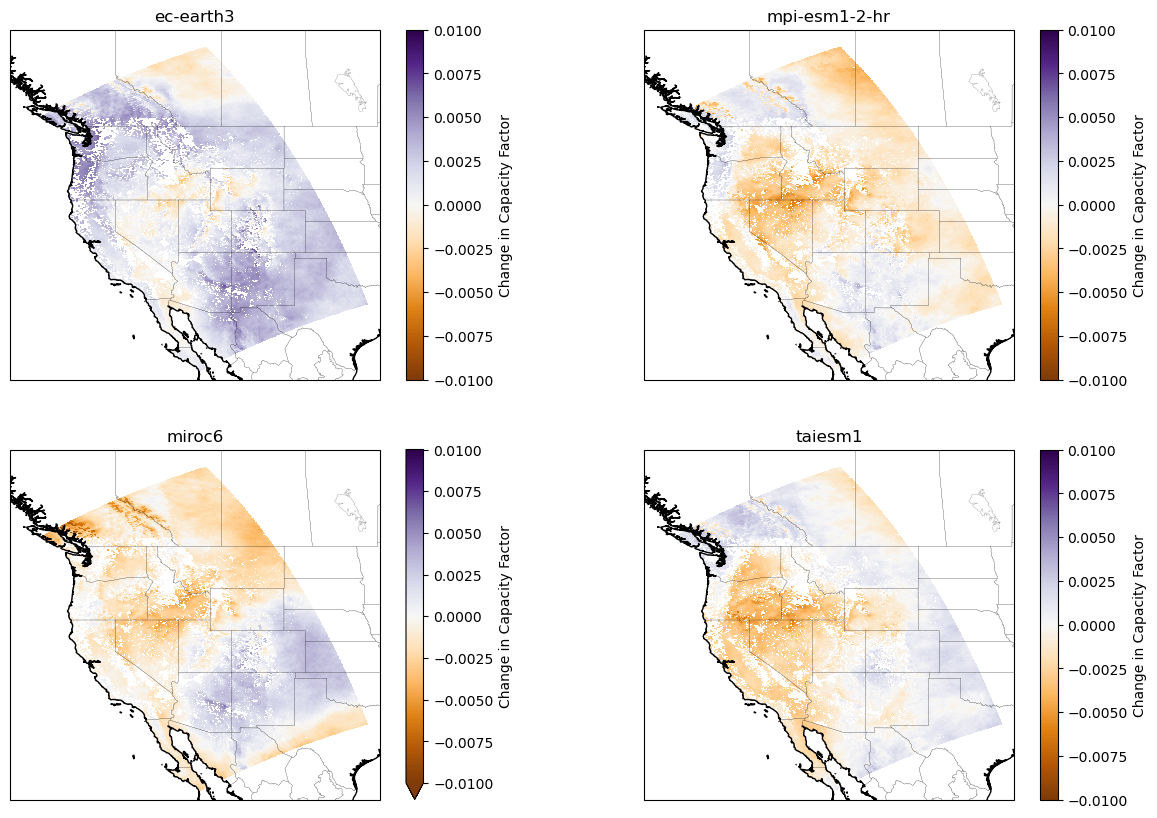

In [17]:
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.01,
        vmax=0.01,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

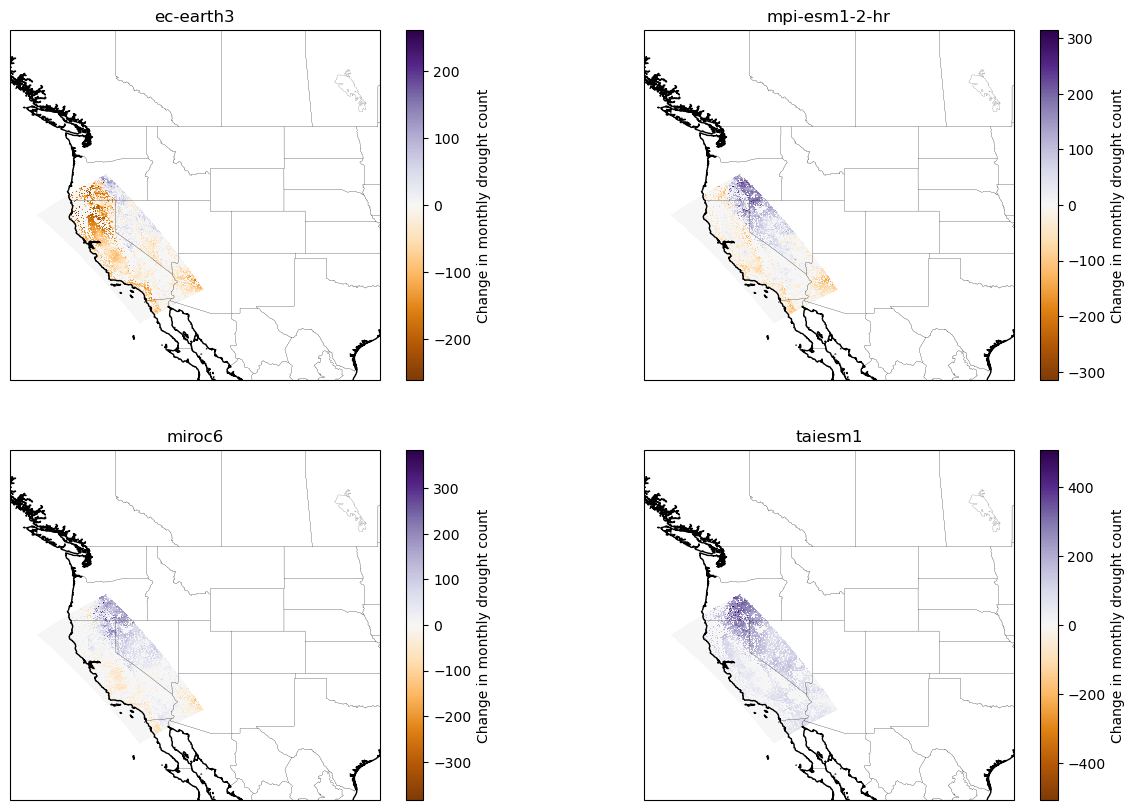

In [28]:
resource = "pv"
module = "utility"
domain = "d03"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = drought_count_delta(
        resource, module, domain, variable, frequency, simulation, "plus08c", "plus30c"
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in monthly drought count"},
        cmap="PuOr",
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

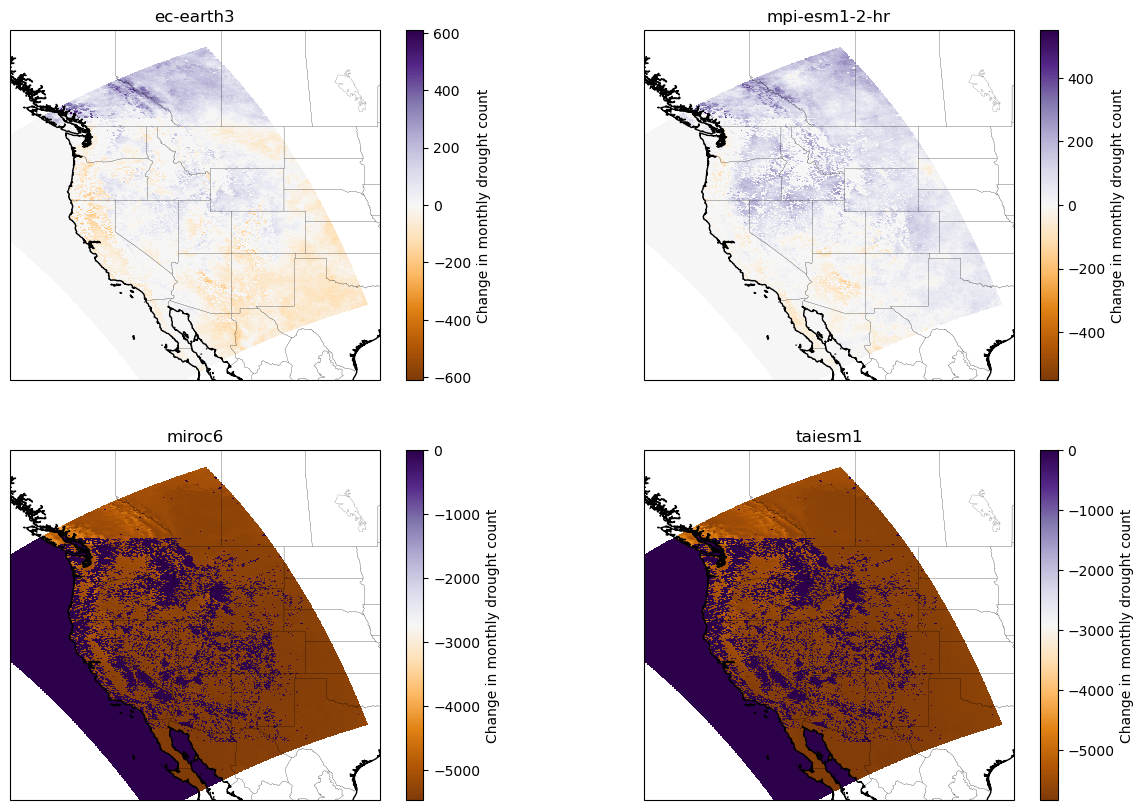

In [29]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "mon"
simulation = "all"
variable = "drought_count"

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
deltas = {}
for simulation in simulations:
    deltas[simulation] = drought_count_delta(
        resource, module, domain, variable, frequency, simulation, "plus08c", "plus30c"
    )
fig, axes = plt.subplots(
    2, 2, figsize=(15, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in monthly drought count"},
        cmap="PuOr",
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")